Case study on Unsupervised Learning
Do the following in the wine dataset.

Read the dataset to the python environment.
Try out different clustering models in the wine dataset.
Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Read the dataset to the python environment.

In [4]:
# load the dataset into the dataframe
# Read the wine dataset
wine_df = pd.read_csv('Wine.csv') 

In [5]:
# Display the data
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# number of elements in each dimension (Rows and Columns)
wine_df.shape

(178, 13)

In [7]:
# Summary of the data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
# Display the columns in the dataset
wine_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [9]:
# Calculating the null values present in each columns in the dataset 
wine_df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
# The Statistical summary of wine dataset
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


2. Try out different clustering models in the wine dataset.

We can go for two clustering models.

1) K-Means Clustering
2) Hierarchial Clustering - Agglomerative Clustering

3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

1. K-Means Clustering

In [11]:
# Normalize the data
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(wine_df), columns=wine_df.columns)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,0.019950,0.007321,0.008428,0.013548,0.018984,0.024783,0.041106
Malic_Acid,178.0,0.003711,0.002499,0.000944,0.001684,0.003174,0.004981,0.014852
Ash,178.0,0.003644,0.001409,0.001473,0.002359,0.003468,0.004506,0.007305
Ash_Alcanity,178.0,0.031124,0.014671,0.007739,0.017615,0.030036,0.040010,0.069703
Magnesium,178.0,0.151541,0.054081,0.064147,0.109775,0.146777,0.183082,0.297958
Total_Phenols,178.0,0.003444,0.001543,0.001255,0.002385,0.002946,0.003886,0.008404
Flavanoids,178.0,0.002973,0.001802,0.000637,0.001746,0.002721,0.003551,0.010560
Nonflavanoid_Phenols,178.0,0.000581,0.000327,0.000145,0.000277,0.000514,0.000833,0.002008
Proanthocyanins,178.0,0.002396,0.001249,0.000554,0.001515,0.002030,0.003040,0.007469
Color_Intensity,178.0,0.007342,0.003843,0.002241,0.004612,0.005981,0.008853,0.021876


In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

1. K-Means Clustering

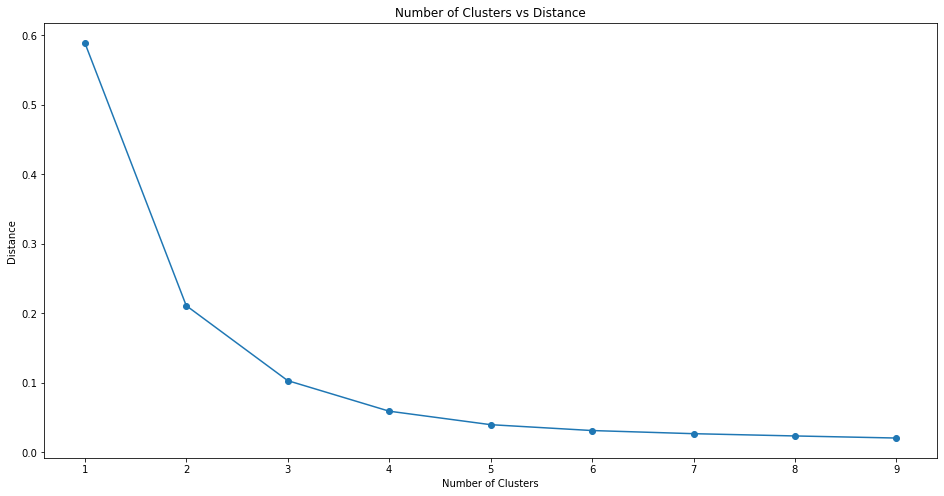

[0.5893776280459067,
 0.21097561296654627,
 0.10306150549665624,
 0.0591007341301072,
 0.03967340500897675,
 0.031229113729223216,
 0.02670871208092469,
 0.023446412195563607,
 0.020448544329050244]

In [12]:
# Finding the optimal clusters using Elbow diagram
from sklearn.cluster import KMeans
# Assign a range for optimal cluster points
ks = range(1,10)
# Create an empty list for getting the inertia values
inertia = [] 
# Creating an instace of the model using for loop
for k in ks:
    # fit the model with the data and check the inertia values to the empty list
    inertia.append(KMeans(n_clusters=k, init = "k-means++", random_state=42).fit(data).inertia_)

# Assign the figure size
plt.figure(figsize = (16, 8))
# Plotting the number of clusters and inertia
plt.plot(ks, inertia, "-o")
# Title of the graph
plt.title("Number of Clusters vs Distance")
# Graph X axis's label name
plt.xlabel("Number of Clusters")
# Graph Y axis's label name
plt.ylabel("Distance")
# show the graph
plt.show()
# Check the interia 
inertia

From the above elbow plot it is clear that, the number of clusters from 5 onwards the inertia value decreases slowly. Therefore we can select the optimun value as 5.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [13]:
# Now we can assign the optimal value as 3 to the KMeans model
model_kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
model_kmeans.fit(data)
kmean_clusters = model_kmeans.labels_
kmean_clusters

array([0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0,
       3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 1, 0, 1, 4, 0,
       2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 4, 0, 0, 2, 2, 1, 2, 2,
       0, 0, 2, 1, 2, 4, 4, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 4, 2, 2, 4, 0,
       2, 4, 2, 1, 1, 1, 2, 4, 1, 2, 2, 4, 4, 1, 1, 1, 1, 1, 4, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 4, 0,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 2])

In [14]:
# Copy the dataframe to the another dataframe
new_data=data.copy()
# Assigning labels to the target variable named Wine_Classes_Kmeans
new_data['Wine_Classes_Kmeans']=kmean_clusters              
new_data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Wine_Classes_Kmeans
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,3
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,3
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,3
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2


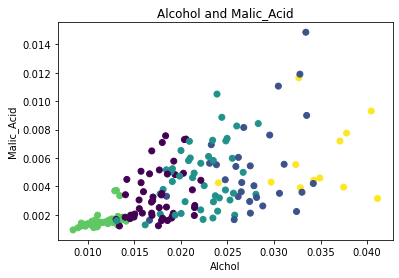

In [15]:
# Plot the digram using sactter plot with Alcohol and Malic Acid
plt.title("Alcohol and Malic_Acid")
plt.scatter(data["Alcohol"], data["Malic_Acid"], c = kmean_clusters)
plt.xlabel("Alchol")
plt.ylabel("Malic_Acid")
plt.show()

From the above scatter plot , it is well clear that the two features of Alcohol and Malic Acid are visualized five optimum clusters, since we have optimised the cluster value as 5 and each data points separated with 5 distinct colors.

2. Hierarchial Clustering - Agglomerative Clustering

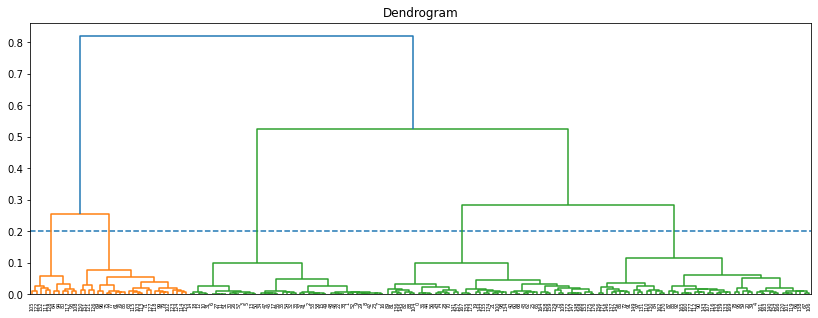

In [16]:
# Using the dendrogram to find the number of clusters by ward method
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(data,method='ward')
plt.figure(figsize=(14,5))
plt.title("Dendrogram")
plt.hlines(0.2, 0, 5000, linestyles="dashed")
dendrogram(linked,orientation='top',distance_sort='ascending',show_leaf_counts=True)
plt.show()

From the above dendrogram plot, it is well clear that, the number of clusters using horizontal line we can identifies that the optimun cluster value as 5.

Now, we can assign the optimum value to the Agglomerative clustering model.

In [17]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
model_agglo = AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage = "ward").fit(data)
agglo_clusters = model_agglo.labels_
agglo_clusters

array([1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 3, 1, 3, 4, 1,
       0, 0, 1, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 4, 1, 1, 0, 0, 3, 0, 0,
       1, 1, 0, 0, 0, 4, 4, 0, 3, 0, 1, 3, 1, 0, 3, 3, 1, 4, 0, 0, 4, 1,
       0, 4, 0, 3, 3, 3, 0, 4, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 4, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 3, 4, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [18]:
# Assigning labels to the target variable named Wine_Classes_Agglomerative
new_data['Wine_Classes_Agglomerative']=agglo_clusters              
new_data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Wine_Classes_Kmeans,Wine_Classes_Agglomerative
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,0,1
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,3,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,3,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,3,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2,0


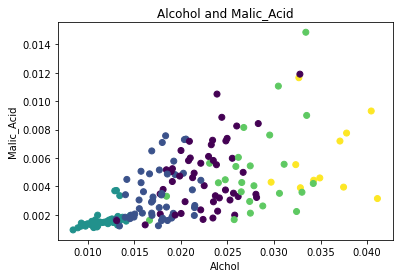

In [19]:
# Plot the digram using sactter plot with Alcohol and Malic Acid
plt.title("Alcohol and Malic_Acid")
plt.scatter(data["Alcohol"], data["Malic_Acid"], c = agglo_clusters)
plt.xlabel("Alchol")
plt.ylabel("Malic_Acid")
plt.show()

From the above scatter plot , it is well clear that the two features of Alcohol and Malic Acid are visualized five optimum clusters, since we have optimised the cluster value as 5 and each data points separated with 5 distinct colors.

From the above two clustering models (K-Means Clustering, Hierarchial Clustering - Agglomerative Clustering) we can clearly say that the wine dataset can be divided into 5 clusters.

In machine learning problems, there are often too many factors on the basis of which the final classification is done. These factors are basically variables called features. The higher the number of features, the harder it gets to visualize the training set and then work on it. Sometimes, most of these features are correlated, and hence redundant. This is where dimensionality reduction algorithms come into play. Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.

We can go for the method is Principal Components Analysis - It combine multiple, coorelated variables into a single components

PCA (Principal Components Analysis)

In [20]:
# number of elements in each dimension (Rows and Columns)
wine_df.shape

(178, 13)

In [21]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(wine_df)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [22]:
# Doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
print(f'Number of Principal Components to explain 95% variance = {pca.n_components_}')

Number of Principal Components to explain 95% variance = 10


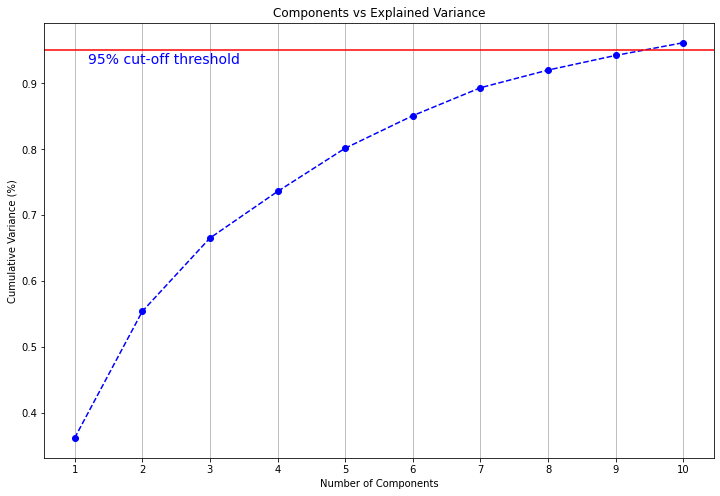

In [23]:
# Plotting the graph of Components vs Explained Variance
plt.figure(figsize = (12, 8))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "o", linestyle = "--", color = "b")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'r', linestyle = "-")
plt.text(1.2, 0.93, "95% cut-off threshold", color = 'b', fontsize = 14)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()


Explained variance represents the information explained using a particular principal components (eigenvectors) and it is calculated as ratio of eigenvalue of a articular principal component (eigenvector) with total eigenvalues.

From the above graph, the Cumulative variance plot clearly shows the contribution of each principal components.

In [25]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

As per the PCA explained variance ratios, we can clearly says that, there are 10 components where:

The first principal component explains 36.19% of the total variations in the dataset.
The second principal component explains 19.20% of the total variations.
The third principal component explains 11.12% of the total variations and so on.